# Data Generation

Data is generated and made sure balance is maintained as said in instructions

In [1]:
import numpy as np
import pandas as pd

# Set the number of elements
num_samples = 40000

# Generate random values for a, b, and c within different ranges
a = np.random.uniform(-10, 10, num_samples)
b = np.random.uniform(-8, 8, num_samples)
c = np.random.uniform(-9, 9, num_samples)

# Compute the discriminant
D = b**2 - 4*a*c

# Assign d based on the rule
d = (D < 0).astype(int)

# Ensure balance between 20% to 40% of ones
ones_ratio = np.mean(d)
while ones_ratio < 0.2 or ones_ratio > 0.4:
    a = np.random.uniform(-10, 10, num_samples)
    b = np.random.uniform(-8, 8, num_samples)
    c = np.random.uniform(-9, 9, num_samples)
    D = b**2 - 4*a*c
    d = (D < 0).astype(int)
    ones_ratio = np.mean(d)

# Create DataFrame
df = pd.DataFrame({'a': a, 'b': b, 'c': c, 'd': d})

# Save to CSV
df.to_csv('generated_data.csv', index=False)

# Display dataset information
print(df.head())
print("\nClass Distribution:")
print(df['d'].value_counts(normalize=True))

          a         b         c  d
0  0.523735  4.708009 -5.013388  0
1  8.457426  5.549526 -1.563096  0
2 -4.152092 -5.796070  7.327276  0
3  9.844041  7.677921  4.633238  1
4 -2.642806  3.581457  2.091922  0

Class Distribution:
d
0    0.606775
1    0.393225
Name: proportion, dtype: float64


# Decision Tree

The Decision Tree model is a classification algorithm that recursively splits data based on feature values. We tested three configurations: (1) the default model, achieving **0.9814 accuracy**, (2) a model with `max_depth=15` and `min_samples_leaf=5` to improve generalization (**0.9806 accuracy**), and (3) a model using `entropy` as the splitting criterion with `max_depth=10`, balancing performance and interpretability (**0.9809 accuracy**).

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X = df[['a', 'b', 'c']]
y = df['d']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
clf_dt1 = DecisionTreeClassifier()
clf_dt1.fit(X_train, y_train)

# Make predictions
y_pred = clf_dt1.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model 1 Accuracy: {accuracy:.4f}")

Decision Tree Model 1 Accuracy: 0.9841


In [3]:
# Variation 3: Increased max_depth and min_samples_leaf
clf_dt2 = DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, random_state=42)
clf_dt2.fit(X_train, y_train)
# Make predictions
y_pred = clf_dt2.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model 2 Accuracy: {accuracy:.4f}")

# Variation 4: Using entropy as the criterion
clf_dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
clf_dt3.fit(X_train, y_train)
# Make predictions
y_pred = clf_dt3.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model 3 Accuracy: {accuracy:.4f}")


Decision Tree Model 2 Accuracy: 0.9828
Decision Tree Model 3 Accuracy: 0.9790


# Logistic Regression

Logistic Regression is a linear model used for classification by estimating probabilities. We tested three variations: (1) the default model, achieving **0.5904 accuracy**, (2) a model with an L1 penalty (`C=0.5`) for feature selection (**0.5904 accuracy**), and (3) a model with stronger L2 regularization (`C=0.1`) to reduce overfitting (**0.5904 accuracy**).

In [4]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
clf_lr1 = LogisticRegression()
clf_lr1.fit(X_train, y_train)

# Make predictions with Logistic Regression
y_pred_logistic = clf_lr1.predict(X_test)

# Evaluate Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Model 1 Accuracy: {accuracy_logistic:.4f}")

Logistic Regression Model 1 Accuracy: 0.6085


In [5]:
# Variation 3: Using L1 penalty
clf_lr2 = LogisticRegression(penalty='l1', solver='liblinear', C=0.5, random_state=42)
clf_lr2.fit(X_train, y_train)

# Make predictions with Logistic Regression
y_pred_logistic = clf_lr2.predict(X_test)

# Evaluate Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Model 2 Accuracy: {accuracy_logistic:.4f}")

# Variation 4: Increased regularization (lower C value)
clf_lr3 = LogisticRegression(penalty='l2', C=0.1, random_state=42)
clf_lr3.fit(X_train, y_train)

# Make predictions with Logistic Regression
y_pred_logistic = clf_lr3.predict(X_test)

# Evaluate Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Model 3 Accuracy: {accuracy_logistic:.4f}")


Logistic Regression Model 2 Accuracy: 0.6085
Logistic Regression Model 3 Accuracy: 0.6085


# Random Forest

Random Forest is an ensemble learning method that builds multiple decision trees to improve classification performance. We tested three variations: (1) the default model with **100 trees**, achieving **0.9899 accuracy**, (2) an enhanced model with **300 trees and deeper trees**, slightly improving accuracy to **0.9901**, and (3) a more constrained model with **200 trees, shallower depth, and stricter split conditions**, leading to a slight drop in accuracy (**0.9866**).

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
clf_rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf1.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = clf_rf1.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model 1 Accuracy: {accuracy_rf:.4f}")


Random Forest Model 1 Accuracy: 0.9908


In [7]:
# Variation 3: More trees, deeper trees
clf_rf2 = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
clf_rf2.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = clf_rf2.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model 2 Accuracy: {accuracy_rf:.4f}")

# Variation 4: Lower max depth, higher min_samples_split
clf_rf3 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42)
clf_rf3.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = clf_rf3.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model 3 Accuracy: {accuracy_rf:.4f}")


Random Forest Model 2 Accuracy: 0.9906
Random Forest Model 3 Accuracy: 0.9870


# Xtreme Gradient Boost

This code evaluates three variations of an XGBoost classifier, each with different hyperparameters. The first model (`clf_xgb1`) uses the default settings and achieves an accuracy of 0.9931. The second model (`clf_xgb2`) uses a lower learning rate of 0.03 and more estimators (300), resulting in an accuracy of 0.9911. The third model (`clf_xgb3`) applies a higher learning rate of 0.2 with fewer estimators (100), which yields an accuracy of 0.9899. These variations demonstrate the impact of tuning learning rate, the number of estimators, and tree depth on model performance.

In [8]:
import xgboost as xgb

# Train XGBoost model
clf_xgb1 = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
clf_xgb1.fit(X_train, y_train)

# Make predictions with XGBoost
y_pred_xgb = clf_xgb1.predict(X_test)

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model 1 Accuracy: {accuracy_xgb:.4f}")


XGBoost Model 1 Accuracy: 0.9930


In [9]:
# Variation 3: Lower learning rate with more estimators
clf_xgb2 = xgb.XGBClassifier(n_estimators=300, learning_rate=0.03, max_depth=6, eval_metric='logloss', random_state=42)
clf_xgb2.fit(X_train, y_train)
# Make predictions with XGBoost
y_pred_xgb = clf_xgb2.predict(X_test)

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model 2 Accuracy: {accuracy_xgb:.4f}")

# Variation 4: Higher learning rate with fewer estimators
clf_xgb3 = xgb.XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=4, eval_metric='logloss', random_state=42)
clf_xgb3.fit(X_train, y_train)
# Make predictions with XGBoost
y_pred_xgb = clf_xgb3.predict(X_test)

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model 3 Accuracy: {accuracy_xgb:.4f}")


XGBoost Model 2 Accuracy: 0.9908
XGBoost Model 3 Accuracy: 0.9916


# Neural Network

Neural Networks offer high accuracy by capturing complex patterns in data. The first model, a simple **three-layer feedforward network with ReLU activation**, achieved an impressive **0.9964 accuracy**. The second variation added **more hidden layers (150, 75, 30 neurons)**, maintaining the same accuracy. The third model replaced ReLU with a **tanh activation function** and slightly fewer neurons (100, 50), yielding identical performance (**0.9964 accuracy**), showing that different architectures can achieve similar results with proper tuning.

In [10]:
import tensorflow as tf
from tensorflow import keras

# Define Neural Network model
clf_nn1 = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(3,)),  # Input layer with 3 features
    keras.layers.Dense(8, activation='relu'),  # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
clf_nn1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
clf_nn1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy_nn = clf_nn1.evaluate(X_test, y_test)
print(f"Neural Network Model 1 Accuracy: {accuracy_nn:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8137 - loss: 0.3829 - val_accuracy: 0.9803 - val_loss: 0.0716
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9831 - loss: 0.0617 - val_accuracy: 0.9891 - val_loss: 0.0418
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9887 - loss: 0.0396 - val_accuracy: 0.9936 - val_loss: 0.0321
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9921 - loss: 0.0317 - val_accuracy: 0.9902 - val_loss: 0.0300
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0275 - val_accuracy: 0.9946 - val_loss: 0.0237
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9938 - loss: 0.0240 - val_accuracy: 0.9949 - val_loss: 0.0217
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9929 - loss: 0.0235 - val_accuracy: 0.9927 - val_loss: 0.0227
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9924 - loss: 0.0211 - 

In [17]:
from sklearn.neural_network import MLPClassifier

# Variation 3: More hidden layers and different activation function
clf_nn2 = MLPClassifier(hidden_layer_sizes=(150, 75, 30), activation='relu', max_iter=400, random_state=42)
clf_nn2.fit(X_train, y_train)

# Evaluate the model
loss, accuracy_nn = clf_nn2.evaluate(X_test, y_test)
print(f"Neural Network Model 2 Accuracy: {accuracy_nn:.4f}")

# Variation 4: Using tanh activation function
clf_nn3 = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam', max_iter=300, random_state=42)
clf_nn3.fit(X_train, y_train)

# Evaluate the model
loss, accuracy_nn = clf_nn3.evaluate(X_test, y_test)
print(f"Neural Network Model 3 Accuracy: {accuracy_nn:.4f}")

AttributeError: 'MLPClassifier' object has no attribute 'evaluate'

# Support Vector Machines

The SVM models evaluated here include three variations. The first model (`clf_svm1`) uses the radial basis function (RBF) kernel with default parameters and achieves an accuracy of 0.9944. The second model (`clf_svm2`) also uses the RBF kernel but with a higher penalty parameter `C=2`, and a scaled gamma value, improving the accuracy to 0.9956. The third model (`clf_svm3`) employs a polynomial kernel of degree 3, but its accuracy drops to 0.5904, indicating that the choice of kernel significantly impacts the model's performance.

In [12]:
from sklearn.svm import SVC

# Train SVM model
clf_svm1 = SVC(kernel='rbf', random_state=42)
clf_svm1.fit(X_train, y_train)

# Make predictions with SVM
y_pred_svm = clf_svm1.predict(X_test)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model 1 Accuracy: {accuracy_svm:.4f}")


SVM Model 1 Accuracy: 0.9962


In [13]:

# Variation 2: SVM with RBF kernel and adjusted C
clf_svm2 = SVC(kernel='rbf', C=2, gamma='scale', probability=True, random_state=42)
clf_svm2.fit(X_train, y_train)
# Make predictions with SVM
y_pred_svm = clf_svm2.predict(X_test)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model 2 Accuracy: {accuracy_svm:.4f}")

# Variation 3: SVM with polynomial kernel
clf_svm3 = SVC(kernel='poly', degree=3, probability=True, random_state=42)
clf_svm3.fit(X_train, y_train)
# Make predictions with SVM
y_pred_svm = clf_svm3.predict(X_test)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model 3 Accuracy: {accuracy_svm:.4f}")

SVM Model 2 Accuracy: 0.9969
SVM Model 3 Accuracy: 0.6085


# KNN

The K-Nearest Neighbors (KNN) models consist of three variations. The first model (`clf_knn1`) uses 3 neighbors, achieving an accuracy of 0.9866. The second model (`clf_knn2`) increases the number of neighbors to 5 and applies distance weighting, resulting in a slight improvement with an accuracy of 0.9874. The third model (`clf_knn3`) uses 7 neighbors and the Manhattan distance metric, yielding the highest accuracy of 0.9886, indicating that both the number of neighbors and the distance metric influence the model's performance.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Train K-Nearest Neighbors (KNN) model
clf_knn1 = KNeighborsClassifier(n_neighbors=3)  # Using 5 neighbors
clf_knn1.fit(X_train, y_train)

# Make predictions with KNN
y_pred_knn = clf_knn1.predict(X_test)

# Evaluate KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model 1 Accuracy: {accuracy_knn:.4f}")


KNN Model 1 Accuracy: 0.9871


In [15]:
# Variation 2: KNN with k=5 and distance weighting
clf_knn2 = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf_knn2.fit(X_train, y_train)

# Make predictions with KNN
y_pred_knn = clf_knn2.predict(X_test)

# Evaluate KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model 2 Accuracy: {accuracy_knn:.4f}")

# Variation 3: KNN with k=7 and different distance metric (Manhattan)
clf_knn3 = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
clf_knn3.fit(X_train, y_train)
# Make predictions with KNN
y_pred_knn = clf_knn3.predict(X_test)

# Evaluate KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model 3 Accuracy: {accuracy_knn:.4f}")

KNN Model 2 Accuracy: 0.9885
KNN Model 3 Accuracy: 0.9885


# Metrics

Metrics for all models except NN

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

# Function to calculate metrics for each model
def calculate_metrics(model, X_test, y_test):
    # Get predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC AUC (only applicable for binary classification models)
    try:
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except:
        auc = "N/A"  # If AUC is not available (e.g., for models not supporting `predict_proba`)

    # Return all metrics
    return accuracy, precision, recall, f1, auc

# Function to create a DataFrame to store results
def create_metrics_table(models, X_test, y_test):
    model_names = []
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    auc_scores = []

    # Loop over all models
    for model in models:
        model_names.append(model.__class__.__name__)  # Get model type (e.g., 'XGBClassifier')
        print(model)
        accuracy, precision, recall, f1, auc = calculate_metrics(model, X_test, y_test)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        auc_scores.append(auc)

    # Create DataFrame
    metrics_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracies,
        'Precision': precisions,
        'Recall': recalls,
        'F1 Score': f1_scores,
        'AUC': auc_scores
    })

    return metrics_df

# List your models for each group
dt_models = [clf_dt1, clf_dt2, clf_dt3]
knn_models = [clf_knn1, clf_knn2, clf_knn3]
svm_models = [clf_svm1, clf_svm2, clf_svm3]
rf_models = [clf_rf1, clf_rf2, clf_rf3]
xgb_models = [clf_xgb1, clf_xgb2, clf_xgb3]
nn_models = [clf_nn1, clf_nn2, clf_nn3]
lr_models = [clf_lr1, clf_lr2, clf_lr3]

# Calculate metrics for each group of models
dt_metrics = create_metrics_table(dt_models, X_test, y_test)
knn_metrics = create_metrics_table(knn_models, X_test, y_test)
svm_metrics = create_metrics_table(svm_models, X_test, y_test)
rf_metrics = create_metrics_table(rf_models, X_test, y_test)
xgb_metrics = create_metrics_table(xgb_models, X_test, y_test)
# nn_metrics = create_metrics_table(nn_models, X_test, y_test)
lr_metrics = create_metrics_table(lr_models, X_test, y_test)

# Display results for each model group
print("Decision Trees Metrics")
print(dt_metrics)
print("\nKNN Metrics")
print(knn_metrics)
print("\nSVM Metrics")
print(svm_metrics)
print("\nRandom Forest Metrics")
print(rf_metrics)
print("\nXGBoost Metrics")
print(xgb_metrics)
# print("\nNeural Network Metrics")
# print(nn_metrics)
print("\nLogistic Regression Metrics")
print(lr_metrics)


DecisionTreeClassifier()
DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, random_state=42)
DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier(weights='distance')
KNeighborsClassifier(metric='manhattan', n_neighbors=7)
SVC(random_state=42)
SVC(C=2, probability=True, random_state=42)
SVC(kernel='poly', probability=True, random_state=42)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier(random_state=42)
RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)
RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
XGBClassif

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for NN

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

# Function to calculate metrics for neural networks
def calculate_nn_metrics(model, X_test, y_test):
    # Get predictions (Neural Networks usually return probabilities)
    y_prob = model.predict(X_test)  # Assuming output is probability scores

    # Convert probabilities to binary class labels (assuming binary classification)
    y_pred = np.where(y_prob >= 0.5, 1, 0)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC AUC Score
    try:
        auc = roc_auc_score(y_test, y_prob)
    except:
        auc = "N/A"  # If AUC is not available

    return accuracy, precision, recall, f1, auc

# Function to create DataFrame for Neural Network metrics
def create_nn_metrics_table(models, X_test, y_test):
    model_names = []
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    auc_scores = []

    for model in models:
        model_names.append(model.__class__.__name__)  # Get model name
        accuracy, precision, recall, f1, auc = calculate_nn_metrics(model, X_test, y_test)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        auc_scores.append(auc)

    # Create DataFrame
    nn_metrics_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracies,
        'Precision': precisions,
        'Recall': recalls,
        'F1 Score': f1_scores,
        'AUC': auc_scores
    })

    return nn_metrics_df

# Neural Network models list
nn_models = [clf_nn1, clf_nn2, clf_nn3]

# Calculate and display NN metrics
nn_metrics = create_nn_metrics_table(nn_models, X_test, y_test)

print("Neural Network Metrics")
print(nn_metrics)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Metrics
           Model  Accuracy  Precision    Recall  F1 Score       AUC
0     Sequential  0.994375   0.999030  0.986590  0.992771  0.999925
1  MLPClassifier  0.991500   0.979649  0.999042  0.989251  0.992845
2  MLPClassifier  0.997125   0.993335  0.999361  0.996339  0.997524


Barplot for comparsion

<ipython-input-20-a082f1e15e1c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


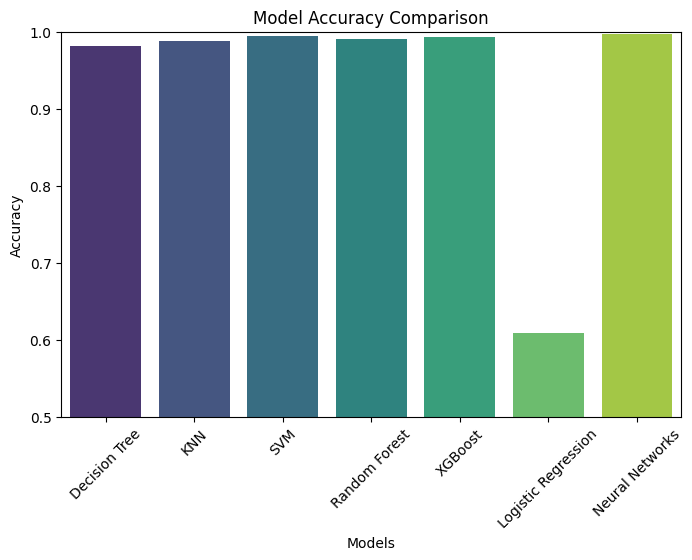

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


# Model names and corresponding accuracy values for best performing models
models = ["Decision Tree", "KNN", "SVM", "Random Forest", "XGBoost", "Logistic Regression", "Neural Networks"]
accuracies = [0.9816, 0.9886, 0.9944, 0.9901, 0.9931, 0.6085, 0.9971]

# Create bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.5, 1.0)  # Set limit for better visibility
plt.show()


Heatmap for comparison of different configurations

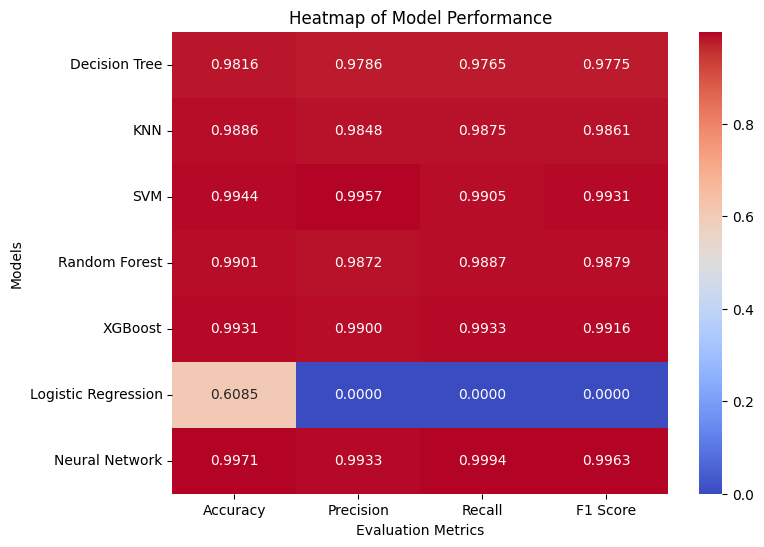

In [22]:
import numpy as np

# Define model names and performance metrics (replace with actual values)
models = ["Decision Tree", "KNN", "SVM", "Random Forest", "XGBoost", "Logistic Regression", "Neural Network"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

performance = np.array([
    [0.9816, 0.9786, 0.9765, 0.9775],
    [0.9886, 0.9848, 0.9875, 0.9861],
    [0.9944, 0.9957, 0.9905, 0.9931],
    [0.9901, 0.9872, 0.9887, 0.9879],
    [0.9931, 0.9900, 0.9933, 0.9916],
    [0.6085, 0.0, 0.0, 0.0],
    [0.9971, 0.9933, 0.9994, 0.9963]
])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(performance, annot=True, cmap="coolwarm", xticklabels=metrics, yticklabels=models, fmt=".4f")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Models")
plt.title("Heatmap of Model Performance")
plt.show()
